<a href="https://colab.research.google.com/github/war-riz/heart-disease-project/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction

## Introduction  
Heart disease is one of the leading causes of death worldwide. Predicting the likelihood of heart disease in patients can help doctors and patients take preventive measures.  

In this project, I will build a **Machine Learning model** to predict whether a patient is likely to have heart disease or not, based on medical attributes.  

### What I Did (so far):
- Set up the Python ML environment using Google Colab or Replit with Kaggle datasets
(e.g., Heart Disease UCI, Diabetes).
- Preprocess handle missing values, encode categorical features, and scale data.
- Train ML models (logistic regression, decision tree, random forest) using scikit-learn.
- Evaluate models with metrics: accuracy, precision, recall, F1-score, ROC-AUC; visualize
results (e.g., confusion matrix, ROC curve).
- Document the project by creating a professional README and toolkit on GitHub, record a
30-second demo video, and design a 5-slide presentation.


## Step 1: Dataset Setup (Kaggle), Load Dataset; Inspect it and Identify Target Column

To train my machine learning model, I need a dataset.  
I am using **Kaggle's Heart Disease dataset** (`redwankarimsony/heart-disease-data`).  
Google Colab allows me to download datasets directly from Kaggle if I upload my API key (`kaggle.json`).  

### What I Did:
- Uploaded my `kaggle.json` API key file to Colab.  
- Configured Kaggle API inside Colab.  
- Downloaded the Heart Disease dataset from Kaggle.  
- Unzipped the dataset into a local folder (`./data`).
- Load the dataset and inspect it.
- Identify target column


In [3]:
# Upload your Kaggle API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"wariskehinde","key":"28567695c8ac927cabe1b158e0740dee"}'}

In [4]:
# Configure Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download Heart Disease dataset from Kaggle
!kaggle datasets download -d redwankarimsony/heart-disease-data -p ./data

# Unzip the dataset
!unzip -o ./data/heart-disease-data.zip -d ./data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 50.0MB/s]
Archive:  ./data/heart-disease-data.zip
  inflating: ./data/heart_disease_uci.csv  


In [5]:
# Load the dataset and inspect it
import pandas as pd

# Load dataset
df = pd.read_csv("/content/data/heart_disease_uci.csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nSummary statistics:")
display(df.describe(include='all'))

print("\nMissing values per column:")
print(df.isna().sum())

Shape of dataset: (920, 16)

First 5 rows:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Summary statistics:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000



Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [6]:
print("\nColumns of the dataset:")
print(df.columns)


Columns of the dataset:
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [7]:
# Identify target column
TARGET = "target" if "target" in df.columns else df.columns[-1]
print("\nTarget column is:", TARGET)
print("Target distribution:\n", df[TARGET].value_counts())


Target column is: num
Target distribution:
 num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [8]:
# check column datatypes to know categorical vs numerical
print(df.dtypes)

# Separate categorical vs numerical columns
categorical_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

Categorical columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


## Step 2: Preprocessing

From the dtype check, we saw that our dataset has both categorical and numerical columns.  

- **Categorical columns:** `sex, dataset, cp, fbs, restecg, exang, slope, thal`  
- **Numerical columns:** `age, trestbps, chol, thalach, oldpeak, ca`  
- **Unnecessary columns:** `id` (just index), `dataset` (just dataset name).  

Also, our target variable `num` has values **0, 1, 2, 3, 4**.  
To make it a binary classification problem, we will convert it to:  
- **0 → no disease**  
- **1 if num > 0 → has disease**  

### What I Did:
1. Dropped `id` and `dataset` since they are not useful.  
2. Checked for missing values and filled them:  
   - Numeric columns → median  
   - Categorical columns → mode (most frequent)  
3. Converted the target column `num` into binary classification.  
4. Encoded categorical columns using pandas `get_dummies` with `drop_first=True` to avoid redundancy.  
5. Split the dataset into **train** and **test** while keeping class balance (`stratify=y`).  
6. Applied **StandardScaler** to scale the numerical features.  

In [9]:
# Handle missing values

# Drop id and dataset since not useful
df_clean = df.drop(columns=["id", "dataset"])

# Numeric columns -> fill with median
for col in df_clean.select_dtypes(include=["int64", "float64"]).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical columns -> fill with mode
for col in df_clean.select_dtypes(include=["object", "bool"]).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("Missing values after imputation:\n", df_clean.isna().sum().sum())
df_clean.head()

Missing values after imputation:
 0


/tmp/ipython-input-406664581.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
# 3. Convert target 'num' into binary (0 = no disease, 1 = disease)

df_clean["target"] = df_clean["num"].apply(lambda x: 1 if x > 0 else 0)
df_clean = df_clean.drop(columns=["num"])

print("Target distribution after binarization:\n", df_clean["target"].value_counts())
df_clean.head()

Target distribution after binarization:
 target
1    509
0    411
Name: count, dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [11]:
# 4. Encode categorical variables automatically

X = df_clean.drop(columns=["target"])
y = df_clean["target"]

# Detect categorical columns (object/bool)
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns.tolist()
print("Categorical columns to encode:", categorical_cols)

# Encode only those categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", X.shape)
print("Preview of encoded features:\n", X.head())

Categorical columns to encode: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Shape after encoding: (920, 18)
Preview of encoded features:
    age  trestbps   chol  thalch  oldpeak   ca  sex_Male  cp_atypical angina  \
0   63     145.0  233.0   150.0      2.3  0.0      True               False   
1   67     160.0  286.0   108.0      1.5  3.0      True               False   
2   67     120.0  229.0   129.0      2.6  2.0      True               False   
3   37     130.0  250.0   187.0      3.5  0.0      True               False   
4   41     130.0  204.0   172.0      1.4  0.0     False                True   

   cp_non-anginal  cp_typical angina  fbs_True  restecg_normal  \
0           False               True      True           False   
1           False              False     False           False   
2           False              False     False           False   
3            True              False     False            True   
4           False              False     Fal

In [12]:
# 5. Train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution in train:\n", y_train.value_counts(normalize=True))
print("Target distribution in test:\n", y_test.value_counts(normalize=True))


Train shape: (736, 18)
Test shape: (184, 18)
Target distribution in train:
 target
1    0.552989
0    0.447011
Name: proportion, dtype: float64
Target distribution in test:
 target
1    0.554348
0    0.445652
Name: proportion, dtype: float64


In [13]:
# 6. Scale numeric features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete. Example scaled row:")
print(X_train_scaled[0][:10])


Scaling complete. Example scaled row:
[-0.06314684  1.56027016 -1.85781647 -0.62720514 -0.80788285 -0.35792038
  0.5249412  -0.48252546  1.84585634 -0.23007121]


## Step 3: Train ML Models

Now that our data is clean, encoded, split, and scaled, we can train our machine learning models.  

We will use three different algorithms:  
1. **Logistic Regression** — a simple linear model, good for baseline.  
2. **Decision Tree** — captures non-linear relationships.  
3. **Random Forest** — an ensemble of decision trees, usually more accurate.  

### What I Did:
1. Imported the models from `scikit-learn`.  
2. Trained Logistic Regression, Decision Tree, and Random Forest on the training set.  
3. Stored predictions so we can evaluate them in the next step.  


In [14]:
# Train Logistic Regression, Decision Tree, and Random Forest

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)   # no scaling needed for trees

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)   # no scaling needed for forests

print("Models trained successfully!")

Models trained successfully!


## Step 4: Evaluate Models

Now I will evaluate all three models.  

For each model, I will:  
- Print Accuracy, Precision, Recall, F1-score, and ROC-AUC.  
- Plot a Confusion Matrix.  
- Plot a ROC Curve.  

Finally, I will create a grouped barplot to compare the metrics across Logistic Regression, Decision Tree, and Random Forest.

In [15]:
# Define evaluation function for metrics + visualization

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay
)
import seaborn as sns
import matplotlib.pyplot as plt

results_dict = {}

def evaluate_model(name, y_true, y_pred, y_proba):
    # Metrics
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }
    results_dict[name] = metrics

    print("\n" + "="*40)
    print(f"{name} Metrics")
    print("="*40)
    for k,v in metrics.items():
        print(f"{k:10s}: {v:.3f}")
    print("="*40 + "\n")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease","Disease"], yticklabels=["No Disease","Disease"])
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    print("\n")

    # ROC Curve
    RocCurveDisplay.from_predictions(y_true, y_proba)
    plt.title(f"{name} - ROC Curve")
    plt.show()

    print("\n" + "="*40 + "\n")



Logistic Regression Metrics
Accuracy  : 0.842
Precision : 0.841
Recall    : 0.882
F1-score  : 0.861
ROC-AUC   : 0.903



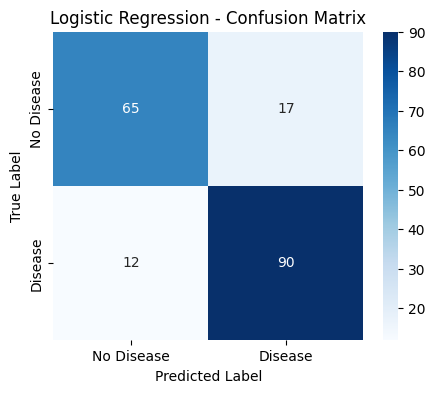

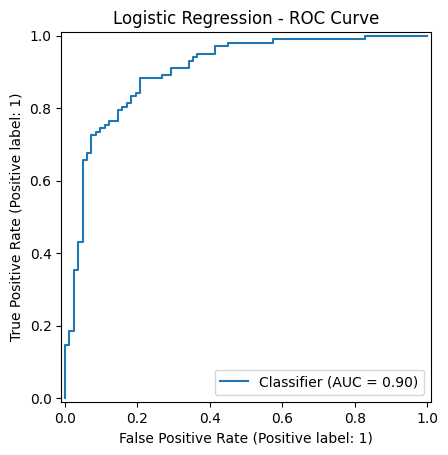

In [16]:
# Evaluate each model

# Logistic Regression
y_pred_log = log_reg.predict(X_test_scaled)
y_proba_log = log_reg.predict_proba(X_test_scaled)[:,1]
evaluate_model("Logistic Regression", y_test, y_pred_log, y_proba_log)


Decision Tree Metrics
Accuracy  : 0.799
Precision : 0.810
Recall    : 0.833
F1-score  : 0.821
ROC-AUC   : 0.795



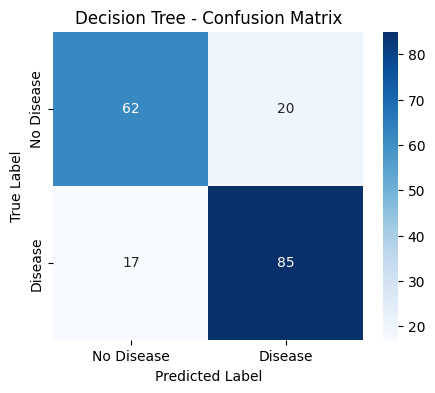

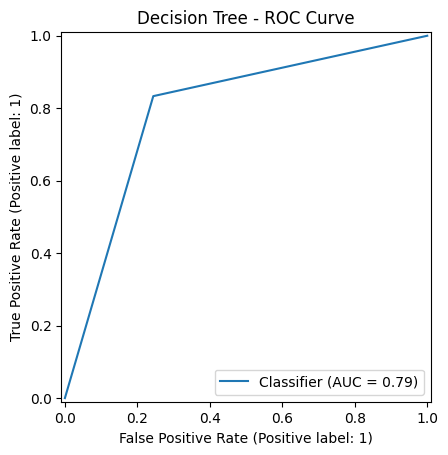

In [17]:
# Decision Tree
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:,1]
evaluate_model("Decision Tree", y_test, y_pred_dt, y_proba_dt)


Random Forest Metrics
Accuracy  : 0.853
Precision : 0.844
Recall    : 0.902
F1-score  : 0.872
ROC-AUC   : 0.916



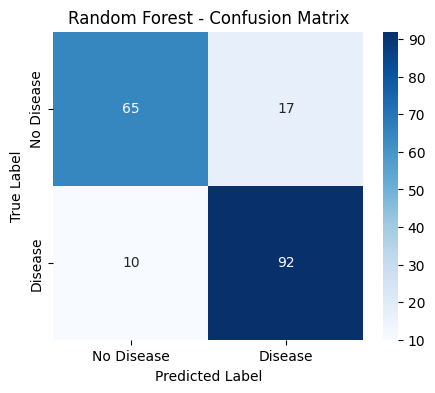

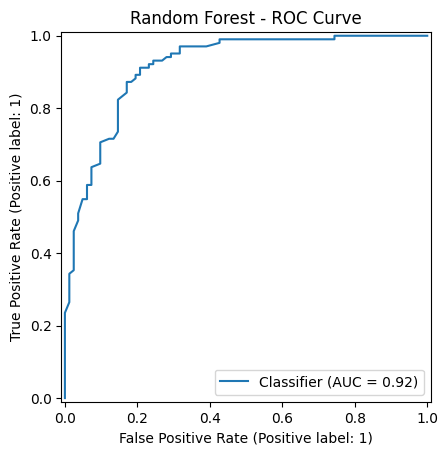

In [18]:
# Random Forest
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)

                     Accuracy  Precision    Recall  F1-score   ROC-AUC
Logistic Regression  0.842391   0.841121  0.882353  0.861244  0.903156
Decision Tree        0.798913   0.809524  0.833333  0.821256  0.794715
Random Forest        0.853261   0.844037  0.901961  0.872038  0.915591




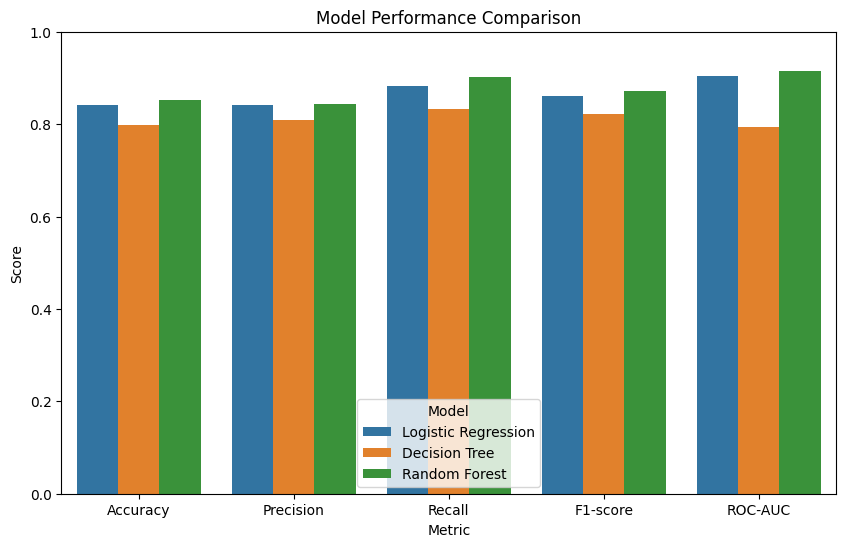

In [19]:
# Compare models with barplot

metrics_df = pd.DataFrame(results_dict).T  # rows = models, columns = metrics
print(metrics_df)

print("\n")

plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df.reset_index().melt(id_vars="index"),
            x="variable", y="value", hue="index")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Metric")
plt.ylim(0,1)
plt.legend(title="Model")
plt.show()


# Heart Disease Prediction: Feature Importance Analysis
## Step 5: Feature Importance Analysis
Now that we have trained and evaluated our models, let's understand which features are most important for predicting heart disease.
Feature importance helps us:

- Understand what factors contribute most to heart disease risk
- Identify the key medical indicators doctors should focus on
- Simplify our model by focusing on the most predictive features
- Provide insights for medical professionals

### We'll use the Random Forest model for feature importance because:

- It performed best in our evaluation
- Tree-based models provide reliable feature importance scores
- It can capture complex relationships between features

In [20]:
# Get feature importance from our trained Random Forest model
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns)

# Get the top 10 most important features
top_features = feat_imp.nlargest(10)

print("Top 10 Most Important Features for Heart Disease Prediction:")
print("="*60)
for i, (feature, importance) in enumerate(top_features.items(), 1):
    print(f"{i:2d}. {feature:<30}: {importance:.4f}")

Top 10 Most Important Features for Heart Disease Prediction:
 1. chol                          : 0.1450
 2. age                           : 0.1296
 3. thalch                        : 0.1272
 4. oldpeak                       : 0.1096
 5. exang_True                    : 0.0907
 6. trestbps                      : 0.0780
 7. cp_atypical angina            : 0.0734
 8. sex_Male                      : 0.0457
 9. cp_non-anginal                : 0.0314
10. thal_normal                   : 0.0299


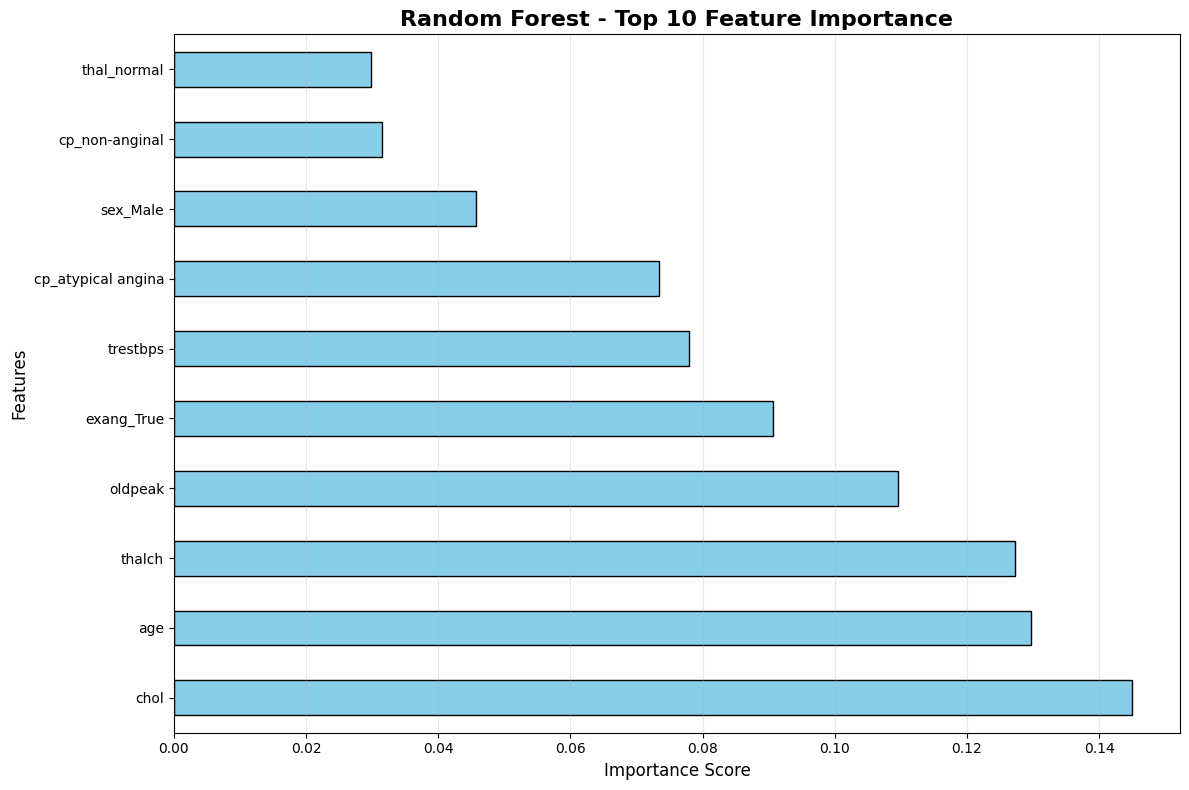

In [21]:
# A horizontal bar plot for better readability
plt.figure(figsize=(12, 8))
top_features.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Random Forest - Top 10 Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Step 6: Save Models and Generate User Template
Now that we understand our model's feature importance, let's save our trained models and create a prediction system for new patients.

This step is crucial for:

- Deployment: Using our model in real-world applications
- Reproducibility: Others can use our trained model without retraining
- Efficiency: No need to retrain the model each time we make predictions

In [29]:
import joblib

# Save the Random Forest model (our best performer)
joblib.dump(rf, 'heart_rf_model.pkl')
print("✓ Random Forest model saved as 'heart_rf_model.pkl'")

# Save the scaler for preprocessing new data
joblib.dump(scaler, 'heart_scaler.pkl')
print("✓ StandardScaler saved as 'heart_scaler.pkl'")

# Save feature column names to ensure consistent preprocessing
feature_columns = X_train.columns.tolist()
print("Feature columns:", feature_columns)

joblib.dump(feature_columns, 'heart_feature_columns.pkl')
print("✓ Feature columns saved as 'heart_feature_columns.pkl'")

print(f"\nModel saved with {len(feature_columns)} features")

✓ Random Forest model saved as 'heart_rf_model.pkl'
✓ StandardScaler saved as 'heart_scaler.pkl'
Feature columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'fbs_True', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']
✓ Feature columns saved as 'heart_feature_columns.pkl'

Model saved with 18 features


In [122]:
# Create a template CSV file with random patients each time
sample_template = X_train.sample(5, random_state=None).copy()
sample_template.to_csv('heart_user_template.csv', index=False)

print("✓ User template saved as 'heart_user_template.csv'")
print("\nTemplate structure:")
print(f"Number of columns: {len(sample_template.columns)}")
print(f"Number of sample rows: {len(sample_template)}")

print("\nFirst 2 rows of template:")
print(sample_template.head(2))

print(f"\nColumn names:")
for i, col in enumerate(sample_template.columns, 1):
    print(f"{i:2d}. {col}")

✓ User template saved as 'heart_user_template.csv'

Template structure:
Number of columns: 18
Number of sample rows: 5

First 2 rows of template:
     age  trestbps   chol  thalch  oldpeak   ca  sex_Male  cp_atypical angina  \
486   60     120.0  246.0   135.0      0.0  0.0      True               False   
592   52     160.0  331.0    94.0      2.5  0.0      True               False   

     cp_non-anginal  cp_typical angina  fbs_True  restecg_normal  \
486            True              False     False           False   
592           False              False     False            True   

     restecg_st-t abnormality  exang_True  slope_flat  slope_upsloping  \
486                     False       False        True            False   
592                     False        True        True            False   

     thal_normal  thal_reversable defect  
486         True                   False  
592         True                   False  

Column names:
 1. age
 2. trestbps
 3. chol
 4. thal

# Step 7: Interactive Prediction System for New Patients
Now let's create an interactive prediction system that allows users to upload their own patient data and get heart disease predictions in Google Colab.
This system will:

- Use the template we created above for consistent data format
- Allow file upload directly in Colab
- Handle data preprocessing automatically
- Make predictions with probability scores and risk levels
- Display results in a user-friendly format

In [123]:
# 1. User uploads their patient data as CSV (same columns as sample template)
from google.colab import files
uploaded = files.upload()

Saving heart_user_template.csv to heart_user_template (1).csv


In [124]:
# 2. Load the Data
filename = list(uploaded.keys())[0]
user_df = pd.read_csv(filename)
print(f"Loaded {len(user_df)} patients")
user_df.head()

Loaded 5 patients


,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,60,120.0,246.0,135.0,0.0,0.0,True,False,True,False,False,False,False,False,True,False,True,False
1,52,160.0,331.0,94.0,2.5,0.0,True,False,False,False,False,True,False,True,True,False,True,False
2,46,150.0,231.0,147.0,3.6,0.0,True,False,True,False,False,True,False,False,True,False,True,False
3,74,140.0,237.0,94.0,0.0,0.0,True,False,True,False,True,True,False,False,True,False,True,False
4,51,130.0,0.0,170.0,-0.7,0.0,True,False,False,False,False,True,False,False,False,True,True,False


In [125]:
# 3. Load Saved Components
# Load our saved model components
model = joblib.load('heart_rf_model.pkl')
scaler = joblib.load('heart_scaler.pkl')
feature_columns = joblib.load('heart_feature_columns.pkl')

print(f"Loaded model with {len(feature_columns)} features")

Loaded model with 18 features


In [126]:
# 4. Handle Missing Values
# Fill missing values the same way as training data
# Numeric columns -> fill with median
for col in user_df.select_dtypes(include=["int64", "float64"]).columns:
    user_df[col] = user_df[col].fillna(user_df[col].median())

# Categorical columns -> fill with mode
for col in user_df.select_dtypes(include=["object", "bool"]).columns:
    mode_val = user_df[col].mode()
    if len(mode_val) > 0:
        user_df[col] = user_df[col].fillna(mode_val[0])

print("Missing values handled:", user_df.isna().sum().sum())

Missing values handled: 0


In [127]:
# 5. Encode Categories (Same as Training)
# One-hot encode categorical variables (same as training)
categorical_cols = user_df.select_dtypes(include=['object', 'bool']).columns.tolist()
user_df_encoded = pd.get_dummies(user_df, columns=categorical_cols, drop_first=True)

print(f"Shape after encoding: {user_df_encoded.shape}")

Shape after encoding: (5, 12)


In [128]:
# 6. Align with Training Features
# Align with saved feature columns from training
user_df_final = user_df_encoded.reindex(columns=feature_columns, fill_value=0)
print(f"Final shape: {user_df_final.shape}")

Final shape: (5, 18)


In [129]:
# 7. Make Predictions
# Convert to DataFrame with feature names before scaling
user_df_named = pd.DataFrame(user_df_final, columns=feature_columns)

# Scale the data using our saved scaler
user_scaled = scaler.transform(user_df_named)

# Make predictions
predictions = model.predict(user_scaled)
probabilities = model.predict_proba(user_scaled)[:, 1]

print("Predictions completed!")

Predictions completed!


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [130]:
# 8. Display Results
# Add predictions to original data
user_df['Heart_Disease_Prediction'] = predictions
user_df['Disease_Probability'] = probabilities.round(3)

# Create risk levels
risk_levels = []
for prob in probabilities:
    if prob < 0.3:
        risk_levels.append('Low')
    elif prob < 0.7:
        risk_levels.append('Medium')
    else:
        risk_levels.append('High')

user_df['Risk_Level'] = risk_levels

# Display results
# Show prediction columns first, then everything else
prediction_cols = ['Heart_Disease_Prediction', 'Disease_Probability', 'Risk_Level']
other_cols = [col for col in user_df.columns if col not in prediction_cols]

print("\nPrediction Results:")
print(user_df[other_cols + prediction_cols])


Prediction Results:
   age  trestbps   chol  thalch  oldpeak   ca  sex_Male  cp_atypical angina  \
0   60     120.0  246.0   135.0      0.0  0.0      True               False   
1   52     160.0  331.0    94.0      2.5  0.0      True               False   
2   46     150.0  231.0   147.0      3.6  0.0      True               False   
3   74     140.0  237.0    94.0      0.0  0.0      True               False   
4   51     130.0    0.0   170.0     -0.7  0.0      True               False   

   cp_non-anginal  cp_typical angina  ...  restecg_normal  \
0            True              False  ...           False   
1           False              False  ...            True   
2            True              False  ...            True   
3            True              False  ...            True   
4           False              False  ...            True   

   restecg_st-t abnormality  exang_True  slope_flat  slope_upsloping  \
0                     False       False        True            Fa

In [131]:
# 9. Summary
# Print summary
print(f"\nSummary:")
print(f"Total patients: {len(user_df)}")
print(f"Disease predicted: {sum(predictions)} patients")
print(f"No disease: {len(predictions) - sum(predictions)} patients")


Summary:
Total patients: 5
Disease predicted: 5 patients
No disease: 0 patients
